In [28]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline

In [9]:
df = pd.read_csv("tuner_output/model_info.csv", sep=", ", engine='python')

In [13]:
df.sort_values('auc', ascending=False)

,c1_W_regularizer,c1_b_regularizer,c1_dropout,c1_filters,d1_W_regularizer,d1_b_regularizer,d1_dropout,d1_size,embedding_W_regularizer,embedding_b_regularizer,embedding_dim,margin,auc
90,0.0010,0.0010,0.30,16,0.1000,0.0100,0.00,32,0.1000,0.0100,16,5.0,0.662741
32,0.0001,0.0100,0.00,32,0.0100,0.1000,0.05,128,0.0001,0.0001,4,5.0,0.659596
26,0.0001,0.0010,0.00,32,0.0000,0.0001,0.00,258,0.0000,0.0001,16,5.0,0.659164
61,0.1000,0.0000,0.05,16,0.0000,0.0001,0.05,258,0.0010,0.1000,4,5.0,0.643361
42,0.0100,0.0000,0.05,32,0.0010,0.0001,0.10,128,0.0100,0.0001,4,5.0,0.636409
70,0.0000,0.0001,0.10,8,0.0100,0.0001,0.00,128,0.0001,0.0100,4,5.0,0.630575
71,0.1000,0.0010,0.00,32,0.0010,0.0000,0.05,128,0.0010,0.1000,4,2.0,0.610732
79,0.0001,0.1000,0.10,32,0.1000,0.0010,0.10,64,0.0000,0.0001,4,2.0,0.610227
14,0.0000,0.0001,0.30,16,0.0001,0.0010,0.50,32,0.0010,0.0010,4,5.0,0.596667
75,0.0000,0.0000,0.50,16,0.0010,0.0000,0.00,32,0.0010,0.0010,4,2.0,0.593758


In [24]:
features = df.columns[0:-1]
X = df[features].values
y = df['auc'].values

In [21]:
rf = RandomForestRegressor()

In [22]:
rf.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [23]:
rf.feature_importances_

array([ 0.01949684,  0.01408718,  0.07889925,  0.01458859,  0.00978247,
        0.00863634,  0.19041204,  0.02641818,  0.00293739,  0.03443902,
        0.1243314 ,  0.47597131])

([<matplotlib.axis.XTick at 0x119e1dc50>,
 <a list of 12 Text xticklabel objects>)

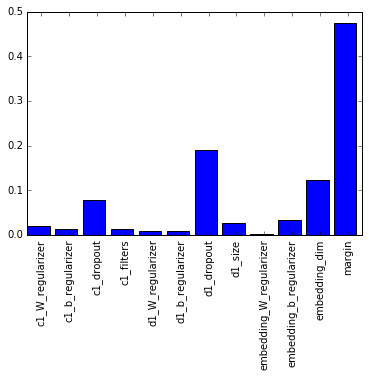

In [33]:
fig, ax = plt.subplots()
n_groups = len(features)
index = np.arange(n_groups)
plt.bar(index, rf.feature_importances_)
plt.xticks(index + 0.5, features, rotation=90)